In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def function_for_roots(x):    #define the function
    a=1.01
    b=-3.04
    c=2.07
    return a*x**2+b*x+c

In [52]:
def check_initial_values(f,x_min,x_max,tol):    #check whether the initial values are valid
    
    y_min=f(x_min)
    y_max=f(x_max)
    
    if(y_min*y_max>=0.0):
        print("No zero crossing found in the range = ",x_min,x_max)
        s="f(%f)=%f,f(%f)=%f" %(x_min,y_min,x_max,y_max)
        print(s)
        return 0
    if(np.fabs(y_min)<tol):
        return 1
    if(np.fabs(y_max)<tol):
        return 2
    return 3

In [55]:
def bisection_root_finding(f,x_min_start,x_max_start,tol):    #define the function that does the root search
    x_min=x_min_start
    x_max=x_max_start
    x_mid=0.0
    y_min=f(x_min)
    y_max=f(x_max)
    y_mid=0.0
    imax=10000
    i=0
    
    flag=check_initial_values(f,x_min,x_max,tol)
    if(flag==0):
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid',x_min,x_max)
    elif(flag==1):
        return x_min
    elif(flag==2):
        return x_max
    
    flag=1
    while(flag):
        x_mid=0.5*(x_min+x_max)
        y_mid=f(x_mid)
        if(np.fabs(y_mid)<tol):
            flag=0
        else:
            if(f(x_min)*f(x_mid)>0):
                x_min=x_mid
            else:
                x_max=x_mid
        print(x_min,f(x_min),x_max,f(x_max))
        
        i+=1
        print("Iteration No",i)   #show the times of iterations
        if(i>=imax):
            print("Exceeded max number of iterations = ",i)
            s="Min bracket f(%f) = %f"% (x_min,f(x_min))
            print(s)
            s="Max bracket f(%f) = %f"% (x_max,f(x_max))
            print(s)
            s="Mid bracket f(%f) = %f"% (x_mid,f(x_mid))
            print(s)
            raise StopIteration('Stopping iterations after ',i)
    
    return x_mid

0.0 2.07
1.5 -0.2175000000000007
0.75 0.3581249999999996 1.5 -0.2175000000000007
Iteration No 1
0.75 0.3581249999999996 1.125 -0.07171875000000005
Iteration No 2
0.9375 0.10769531249999975 1.125 -0.07171875000000005
Iteration No 3
1.03125 0.009111328124999485 1.125 -0.07171875000000005
Iteration No 4
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
Iteration No 5
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
Iteration No 6
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
Iteration No 7
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
Iteration No 8
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
Iteration No 9
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
Iteration No 10
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
Iteration No 11
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
Iteration No 12
1.040771484375 9.202301502186927

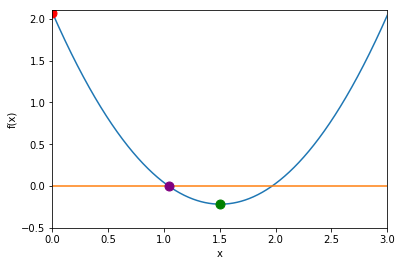

Root found with y(1.040869) = 0.000001


In [56]:
x_min=0.0
x_max=1.5
tolerance=1.0e-6

print(x_min,function_for_roots(x_min))
print(x_max,function_for_roots(x_max))

x_root=bisection_root_finding(function_for_roots,x_min,x_max,tolerance)
y_root=function_for_roots(x_root)

x=np.linspace(0,3,1000)  #set x and y values
y=function_for_roots(x)
z=0.0*x                  #set the z=0 line
plt.plot(x,y)
plt.plot(x,z)
plt.xlim(0,3)            #set x and y limits
plt.ylim(-0.5,2.1)
plt.xlabel('x')
plt.ylabel('f(x)')

#Plot the initial bracketing points as well as the root we get
plt.plot(x_min,function_for_roots(x_min),marker='o',markersize=9,color="red")
plt.plot(x_max,function_for_roots(x_max),marker='o',markersize=9,color="green")
plt.plot(x_root,y_root,marker='o',markersize=9,color="purple")

plt.show()

#print the root
s="Root found with y(%f) = %f"%(x_root,y_root)
print(s)